### Previous: <a href = "keras_11.ipynb">1.11 Units</a>

# <center> Keras </center>
## <center>1.12 Dropout</center> 

# Explanation

# Dropout
Dropout reduces the complexity of a model.<br>
It helps protect the model from memorizing or "overfitting" the training data.
Dropout, applied to a layer, consists of randomly "dropping out" (i.e. setting to zero) a
number of output features of the layer during training.
<img src="img/Dropout.jpg"  width="600"/>
<img src="img/dropout.png"  width="600"/>

Through dropout the network can't always relay on all of its knowledge, thus it has to classify with less nodes. This makes the whole network more robust and prevents overfitting.<br><br>
Dropout helps to improve the accuracy when there is not much data to train on.<br>
As not every layer is fully connected to the next one, less computing cost is needed.

# Best practice
Fully conected is not always better

In [1]:
#previously done
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD, Adam, Adamax
from keras.utils import np_utils
from keras.utils.vis_utils import model_to_dot
from keras.datasets import mnist
from keras.datasets import mnist
from keras.utils import np_utils
%matplotlib inline
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG
#Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#Reshape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
#Split
X_train = X_train[0:10000]
X_test = X_test[0:1000]
Y_train = Y_train[0:10000]
Y_test = Y_test[0:1000]

def plot_training_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    #loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


Using TensorFlow backend.


# Example

In [4]:
model = Sequential()
model.add(Dense(input_dim=28*28, units=500, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=500, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))
BATCH_SIZE= 100
NP_EPOCHS = 10

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Train on 10000 samples, validate on 1000 samples
Epoch 1/10
10000/10000 [==============================] - 3s 335us/step - loss: 0.4653 - acc: 0.8691 - val_loss: 0.2869 - val_acc: 0.9170
Epoch 2/10
10000/10000 [==============================] - 3s 286us/step - loss: 0.1753 - acc: 0.9479 - val_loss: 0.1917 - val_acc: 0.9350
Epoch 3/10
10000/10000 [==============================] - 3s 291us/step - loss: 0.1016 - acc: 0.9685 - val_loss: 0.1909 - val_acc: 0.9380
Epoch 4/10
10000/10000 [==============================] - 3s 294us/step - loss: 0.0656 - acc: 0.9809 - val_loss: 0.1548 - val_acc: 0.9470
Epoch 5/10
10000/10000 [==============================] - 3s 291us/step - loss: 0.0384 - acc: 0.9891 - val_loss: 0.1653 - val_acc: 0.9480
Epoch 6/10
10000/10000 [==============================] - 3s 327us/step - loss: 0.0260 - acc: 0.9921 - val_loss: 0.1376 - val_acc: 0.9580
Epoch 7/10
10000/10000 [==============================] - 3s 315us/step - loss: 0.0174 - acc: 0.9958 - val_loss: 0.1497 - v

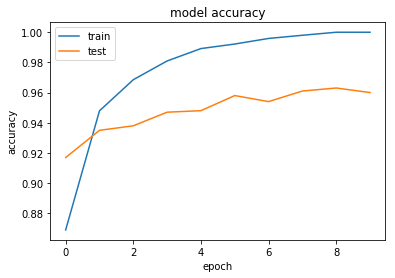

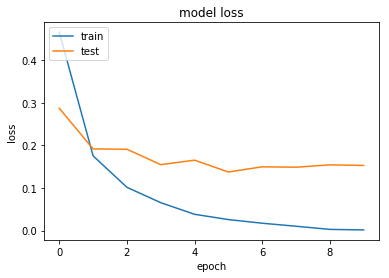

In [5]:
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NP_EPOCHS,
                    verbose=1, validation_data=(X_test, Y_test))
plot_training_history(history)

# Task
Try out the following dropout-rates:<br>
a) 0.1<br>
b) 0.9

# Feedback

### Next:   <a href="../TensorFlow/tensorflow_01.ipynb">Check out TensorFlow 2.1 Structure</a>